In [380]:

import math
import pandas as pd #программная библиотека на языке Python для обработки и анализа данных.
import numpy as np #программная библиотека на языке Python для работы с многомерными массивам.
import  matplotlib.pyplot as plt # библиотека на языке программирования Python для визуализации данных двумерной графикой.
import seaborn as sns #библиотека на matplotlib. Предоставляет высокоуровневый интерфейс для рисования привлекательных и информативных статистических графиков.
import scipy.stats as sps #библиотека для языка программирования Python с открытым исходным кодом, предназначенная для выполнения научных и инженерных расчётов.

In [381]:
N = 600  # Размер выборки
alpha = 0.01  # Уровень значимости

# Генерируем случайную выборку с нормальным распределением
mean = 0  # Среднее значение
std_dev = 1  # Среднеквадратическое отклонение
L = np.random.normal(mean, std_dev, N)

In [382]:
L.sort()
print(L)

[-2.92001305e+00 -2.44526539e+00 -2.23498845e+00 -2.22726126e+00
 -2.20060936e+00 -2.16635847e+00 -2.16015655e+00 -2.10696663e+00
 -2.08094191e+00 -2.02794354e+00 -1.98347191e+00 -1.91214902e+00
 -1.87824717e+00 -1.84926188e+00 -1.81392310e+00 -1.80702150e+00
 -1.78483437e+00 -1.76763592e+00 -1.74281163e+00 -1.69529564e+00
 -1.69158251e+00 -1.68925129e+00 -1.68752680e+00 -1.67023985e+00
 -1.66234220e+00 -1.64963823e+00 -1.60561897e+00 -1.60524688e+00
 -1.58419672e+00 -1.56123498e+00 -1.55214948e+00 -1.54266394e+00
 -1.52238970e+00 -1.50981459e+00 -1.48324776e+00 -1.46785269e+00
 -1.45270886e+00 -1.42617086e+00 -1.42293703e+00 -1.42147016e+00
 -1.40277438e+00 -1.39442209e+00 -1.37273638e+00 -1.36764985e+00
 -1.35660381e+00 -1.33974822e+00 -1.33325128e+00 -1.32879735e+00
 -1.30259360e+00 -1.29168304e+00 -1.23989796e+00 -1.21755724e+00
 -1.20041367e+00 -1.18685714e+00 -1.16865922e+00 -1.14875220e+00
 -1.14668776e+00 -1.13932803e+00 -1.12570331e+00 -1.12519686e+00
 -1.11978673e+00 -1.11747

In [383]:
Min=L[0]
Max=L[len(L)-1]
print(Min)
print(Max)

-2.920013053308886
3.494967369447637


In [384]:
m=7

In [385]:
d=(Max-Min)/m
print(d)
bins= [Min+d*i for i in range(8)]
print(bins)

0.9164257746795033
[-2.920013053308886, -2.003587278629383, -1.0871615039498796, -0.17073572927037617, 0.7456900454091269, 1.66211582008863, 2.578541594768134, 3.494967369447637]


In [386]:
df = pd.DataFrame({'Интервал': ['('+str(round(Min+d*i,2))+';'+str(round(Min+d*(i+1),2))+')' for i in range(7)], 'Частота': [0 for i in range(m)]})
for i in range(len(bins)-1):
  k=0
  for j in L:
    if(j>=bins[i]) and (j<=bins[i+1]):
      k+=1
  df.at[i,"Частота"]=k
df

,Интервал,Частота
0,(-2.92;-2.0),10
1,(-2.0;-1.09),58
2,(-1.09;-0.17),195
3,(-0.17;0.75),218
4,(0.75;1.66),99
5,(1.66;2.58),17
6,(2.58;3.49),3


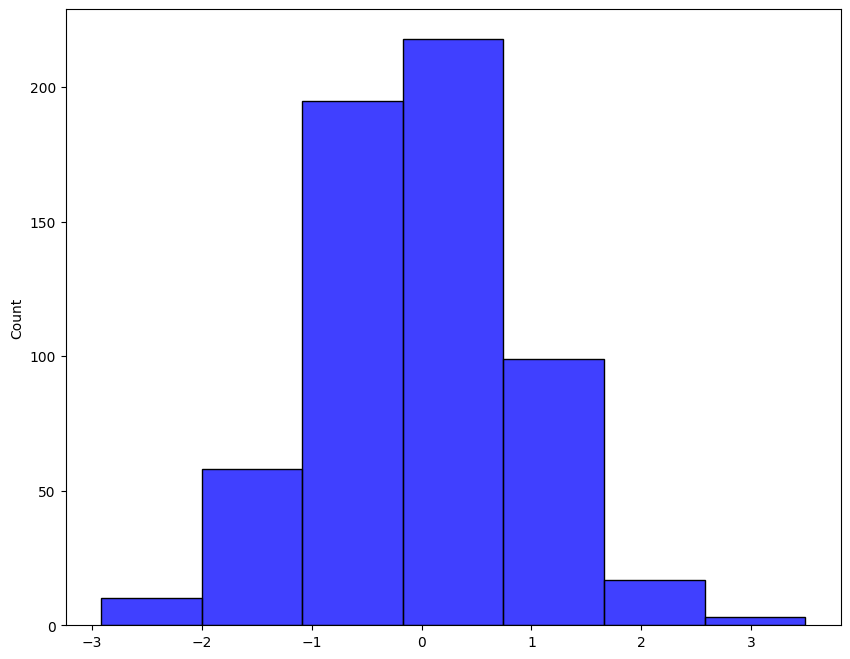

In [387]:
sns.histplot(data=L, bins=bins, color='blue')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [388]:
df.insert(2, "Относительная частота", [df.at[i,"Частота"]/len(L) for i in range(7)])
df

,Интервал,Частота,Относительная частота
0,(-2.92;-2.0),10,0.016667
1,(-2.0;-1.09),58,0.096667
2,(-1.09;-0.17),195,0.325000
3,(-0.17;0.75),218,0.363333
4,(0.75;1.66),99,0.165000
5,(1.66;2.58),17,0.028333
6,(2.58;3.49),3,0.005000


In [389]:
df.insert(3, "Плотность частоты", [round(df.at[i,"Относительная частота"]/(bins[1]-bins[0]),4) for i in range(7)])
df

,Интервал,Частота,Относительная частота,Плотность частоты
0,(-2.92;-2.0),10,0.016667,0.0182
1,(-2.0;-1.09),58,0.096667,0.1055
2,(-1.09;-0.17),195,0.325000,0.3546
3,(-0.17;0.75),218,0.363333,0.3965
4,(0.75;1.66),99,0.165000,0.1800
5,(1.66;2.58),17,0.028333,0.0309
6,(2.58;3.49),3,0.005000,0.0055


In [390]:
Total = df['Относительная частота'].sum()
print(Total)

1.0


In [391]:
df.insert(4, "Середина интервала", [round((bins[1]-bins[0])/2+bins[i],2) for i in range(7)])
df

,Интервал,Частота,Относительная частота,Плотность частоты,Середина интервала
0,(-2.92;-2.0),10,0.016667,0.0182,-2.46
1,(-2.0;-1.09),58,0.096667,0.1055,-1.55
2,(-1.09;-0.17),195,0.325000,0.3546,-0.63
3,(-0.17;0.75),218,0.363333,0.3965,0.29
4,(0.75;1.66),99,0.165000,0.1800,1.20
5,(1.66;2.58),17,0.028333,0.0309,2.12
6,(2.58;3.49),3,0.005000,0.0055,3.04


In [392]:
df1=pd.DataFrame()
df1=df[["Интервал","Середина интервала","Относительная частота","Плотность частоты"]]
df1.insert(4, "Сумма относительной частоты", [df.at[i,"Относительная частота"] for i in range(7)])
s=0
for i in range(7):
  df1.at[i,"Сумма относительной частоты"]=s+df1.at[i,"Сумма относительной частоты"]
  s=df1.at[i,"Сумма относительной частоты"]
df1.at[6,"Сумма относительной частоты"]=1
df1

,Интервал,Середина интервала,Относительная частота,Плотность частоты,Сумма относительной частоты
0,(-2.92;-2.0),-2.46,0.016667,0.0182,0.016667
1,(-2.0;-1.09),-1.55,0.096667,0.1055,0.113333
2,(-1.09;-0.17),-0.63,0.325000,0.3546,0.438333
3,(-0.17;0.75),0.29,0.363333,0.3965,0.801667
4,(0.75;1.66),1.20,0.165000,0.1800,0.966667
5,(1.66;2.58),2.12,0.028333,0.0309,0.995000
6,(2.58;3.49),3.04,0.005000,0.0055,1.000000


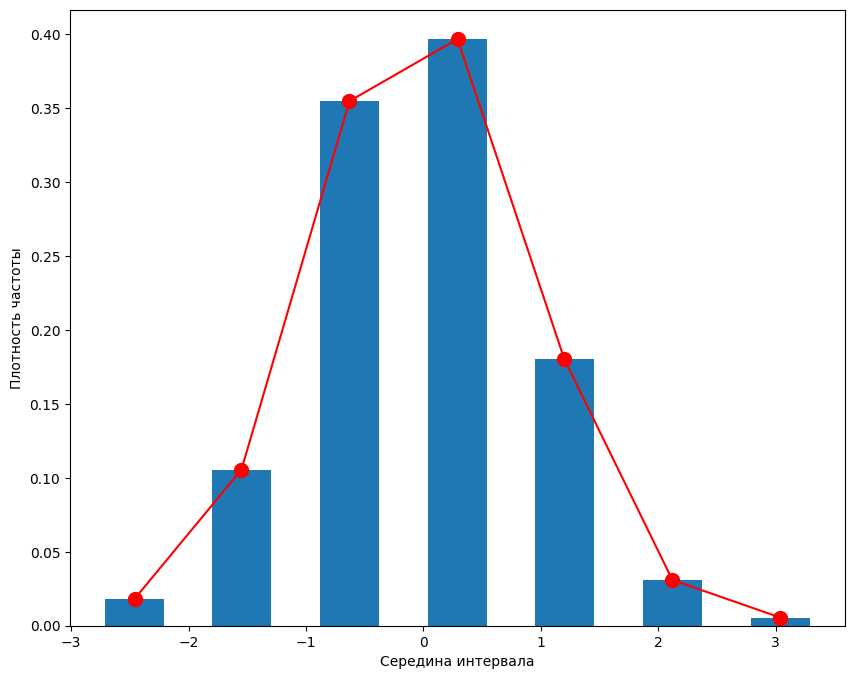

In [393]:

import matplotlib.pyplot as plt

x = [df.at[i,'Середина интервала'] for i in range(7)]
y = [df.at[i,'Плотность частоты'] for i in range(7)]
plt.bar(x,y,align='center',width=0.5) # A bar chart
plt.plot(x,y,color="red")
plt.scatter(x,y,color="red",s=100)
plt.ylabel('Плотность частоты')
plt.xlabel('Середина интервала')
fig=plt.gcf()
fig.set_size_inches(10,8)

In [394]:
L1=[]
for i in range(len(L)):
  L1+=[L[i]/(len(L)*(bins[1]-bins[0]))]

In [395]:
M=sum(L)/len(L)  # выборочное среднее
M

-0.0009540912317085478

In [396]:
sigma=M*(2/3.14)**0.5
sigma

-0.000761447698612151

In [397]:
df2=df[["Интервал","Частота","Середина интервала","Плотность частоты"]]
df2.insert(4, "Теоретическая плотность", [df.at[i,'Середина интервала']/(sigma*sigma)*math.exp(-df.at[i,'Середина интервала']*df.at[i,'Середина интервала']/(2*sigma*sigma)) for i in range(7)])
df2

,Интервал,Частота,Середина интервала,Плотность частоты,Теоретическая плотность
0,(-2.92;-2.0),10,-2.46,0.0182,-0.0
1,(-2.0;-1.09),58,-1.55,0.1055,-0.0
2,(-1.09;-0.17),195,-0.63,0.3546,-0.0
3,(-0.17;0.75),218,0.29,0.3965,0.0
4,(0.75;1.66),99,1.20,0.1800,0.0
5,(1.66;2.58),17,2.12,0.0309,0.0
6,(2.58;3.49),3,3.04,0.0055,0.0


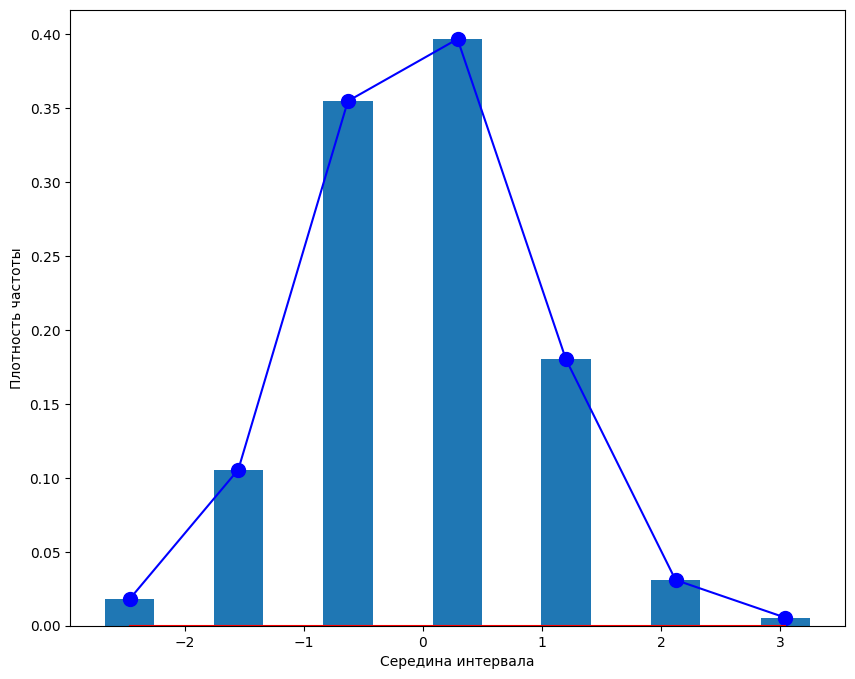

In [398]:
import matplotlib.pyplot as plt

x = [df.at[i,'Середина интервала'] for i in range(7)]
y = [df.at[i,'Плотность частоты'] for i in range(7)]
plt.bar(x,y,align='center',width=0.413) # A bar chart
plt.plot(x,y,color="blue")
plt.scatter(x,y,color="blue",s=100)
x1 = [df2.at[i,'Середина интервала'] for i in range(7)]
y1 = [df2.at[i,'Теоретическая плотность'] for i in range(7)]
plt.ylabel('Плотность частоты')
plt.xlabel('Середина интервала')
plt.plot(x1,y1,color="red")
fig=plt.gcf()
fig.set_size_inches(10,8)

In [399]:
def F(x,sigma):
  return 1-math.exp(-x*x/(2*sigma*sigma))
Min=L[0]
Max=L[len(L)-1]
print(Min)
print(Max)
d=(Max-Min)/m
print(d)
bins= [Min+d*i for i in range(8)]
print(bins)

-2.920013053308886
3.494967369447637
0.9164257746795033
[-2.920013053308886, -2.003587278629383, -1.0871615039498796, -0.17073572927037617, 0.7456900454091269, 1.66211582008863, 2.578541594768134, 3.494967369447637]


In [400]:
a=0
b=0
for i in range(7):
  a=round(Min+d*i,2)
  b=round(Min+d*(i+1),2)
  df2.at[i,"Вероятность pi*"]=( 1-math.exp(-b*b/(2*sigma*sigma)))-( 1-math.exp(-a*a/(2*sigma*sigma)))
df2

C:\Users\dimar\AppData\Local\Temp\ipykernel_1192\130014228.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.at[i,"Вероятность pi*"]=( 1-math.exp(-b*b/(2*sigma*sigma)))-( 1-math.exp(-a*a/(2*sigma*sigma)))


,Интервал,Частота,Середина интервала,Плотность частоты,Теоретическая плотность,Вероятность pi*
0,(-2.92;-2.0),10,-2.46,0.0182,-0.0,0.0
1,(-2.0;-1.09),58,-1.55,0.1055,-0.0,0.0
2,(-1.09;-0.17),195,-0.63,0.3546,-0.0,0.0
3,(-0.17;0.75),218,0.29,0.3965,0.0,0.0
4,(0.75;1.66),99,1.20,0.1800,0.0,0.0
5,(1.66;2.58),17,2.12,0.0309,0.0,0.0
6,(2.58;3.49),3,3.04,0.0055,0.0,0.0


In [401]:
SumFr=0
for i in range(7):
  SumFr+=df2.at[i,"Частота"]

In [402]:
for i in range(7):
  df2.at[i,"Ожидаемые значения n*pi*"]=SumFr*df2.at[i,"Вероятность pi*"]
df2

C:\Users\dimar\AppData\Local\Temp\ipykernel_1192\1712323443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.at[i,"Ожидаемые значения n*pi*"]=SumFr*df2.at[i,"Вероятность pi*"]


,Интервал,Частота,Середина интервала,Плотность частоты,Теоретическая плотность,Вероятность pi*,Ожидаемые значения n*pi*
0,(-2.92;-2.0),10,-2.46,0.0182,-0.0,0.0,0.0
1,(-2.0;-1.09),58,-1.55,0.1055,-0.0,0.0,0.0
2,(-1.09;-0.17),195,-0.63,0.3546,-0.0,0.0,0.0
3,(-0.17;0.75),218,0.29,0.3965,0.0,0.0,0.0
4,(0.75;1.66),99,1.20,0.1800,0.0,0.0,0.0
5,(1.66;2.58),17,2.12,0.0309,0.0,0.0,0.0
6,(2.58;3.49),3,3.04,0.0055,0.0,0.0,0.0


In [403]:
Total = df2['Вероятность pi*'].sum()
print(Total)

0.0


In [404]:
for i in range(7):
  df2.at[i,"(ni-npi*)^2/(npi*)"]=(df2.at[i,"Частота"]-df2.at[i,"Ожидаемые значения n*pi*"])**2/df2.at[i,"Ожидаемые значения n*pi*"]
df2

C:\Users\dimar\AppData\Local\Temp\ipykernel_1192\31854066.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  df2.at[i,"(ni-npi*)^2/(npi*)"]=(df2.at[i,"Частота"]-df2.at[i,"Ожидаемые значения n*pi*"])**2/df2.at[i,"Ожидаемые значения n*pi*"]
C:\Users\dimar\AppData\Local\Temp\ipykernel_1192\31854066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.at[i,"(ni-npi*)^2/(npi*)"]=(df2.at[i,"Частота"]-df2.at[i,"Ожидаемые значения n*pi*"])**2/df2.at[i,"Ожидаемые значения n*pi*"]
C:\Users\dimar\AppData\Local\Temp\ipykernel_1192\31854066.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  df2.at[i,"(ni-npi*)^2/(npi*)"]=(df2.at[i,"Частота"]-df2.at[i,"Ожидаемые значения n*pi*"])**2/df2.at[i,"Ожидаемые значения n*pi*"]


,Интервал,Частота,Середина интервала,Плотность частоты,Теоретическая плотность,Вероятность pi*,Ожидаемые значения n*pi*,(ni-npi*)^2/(npi*)
0,(-2.92;-2.0),10,-2.46,0.0182,-0.0,0.0,0.0,inf
1,(-2.0;-1.09),58,-1.55,0.1055,-0.0,0.0,0.0,inf
2,(-1.09;-0.17),195,-0.63,0.3546,-0.0,0.0,0.0,inf
3,(-0.17;0.75),218,0.29,0.3965,0.0,0.0,0.0,inf
4,(0.75;1.66),99,1.20,0.1800,0.0,0.0,0.0,inf
5,(1.66;2.58),17,2.12,0.0309,0.0,0.0,0.0,inf
6,(2.58;3.49),3,3.04,0.0055,0.0,0.0,0.0,inf


In [405]:
p_view=0
for i in range(7):
  p_view+=df2.at[i,"(ni-npi*)^2/(npi*)"]
p_view

inf